# K-means using Iris Dataset

# Loading the dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [61]:
iris = pd.read_csv("/home/rokesh/Iris.csv")
iris = iris.drop(iris.iloc[:,0:1],axis=1)
iris_x = iris.iloc[:,:-1].values
iris_y = iris.iloc[:,-1].values

In [62]:
print("Shape of Iris dataset",iris.shape)
iris.head()

Shape of Iris dataset (150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Implementing PCA in the Iris dataset

In [63]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        
    def fit_transform(self,X):
        n = self.n_components
        X_standardized = (X - np.mean(X,axis=0))/np.std(X,axis=0)
        cov_max = np.cov(X_standardized,rowvar=False)
        eigen_value,eigen_vector = np.linalg.eigh(cov_max)
        self.eigenvector_subset = eigen_vector[:,:-n-1:-1]
        return X_standardized @ self.eigenvector_subset

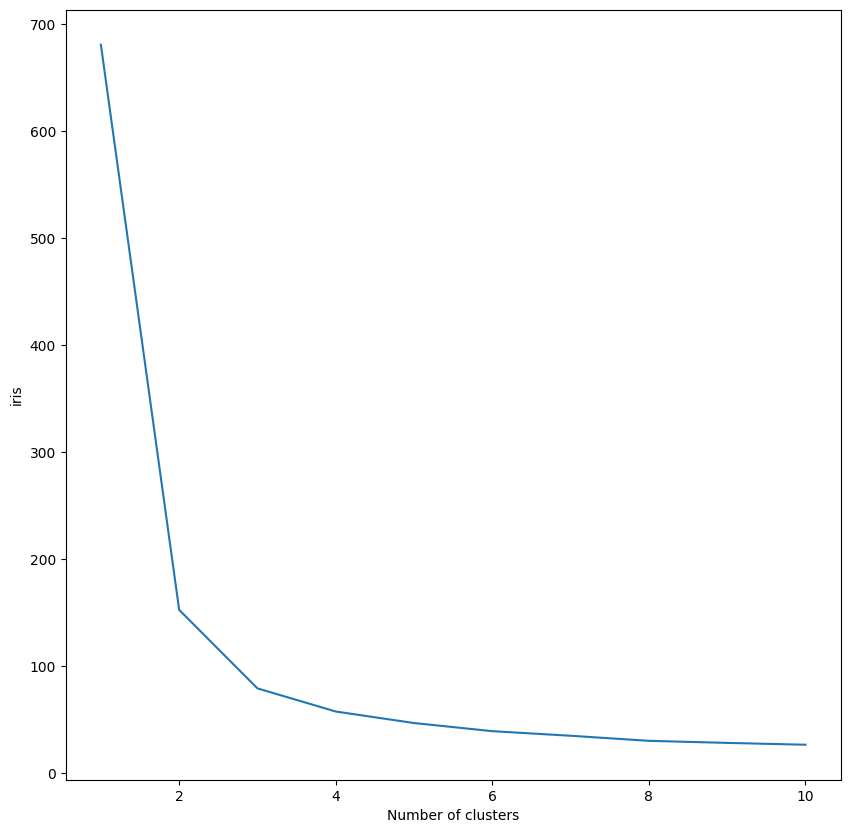

In [64]:
iris = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(iris_x)
   iris.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), iris)
plt.xlabel('Number of clusters')
plt.ylabel('iris')
plt.show()

In [65]:
pca = PCA(2)
reduced_iris_x = pca.fit_transform(iris_x)
reduced_iris_df = pd.DataFrame(reduced_iris_x,columns=["PC1","PC2"])
display(reduced_iris_df)

,PC1,PC2
0,2.264542,0.505704
1,2.086426,-0.655405
2,2.367950,-0.318477
3,2.304197,-0.575368
4,2.388777,0.674767
...,...,...
145,-1.870522,0.382822
146,-1.558492,-0.905314
147,-1.520845,0.266795
148,-1.376391,1.016362


# Visualizing the reduced iris dataset

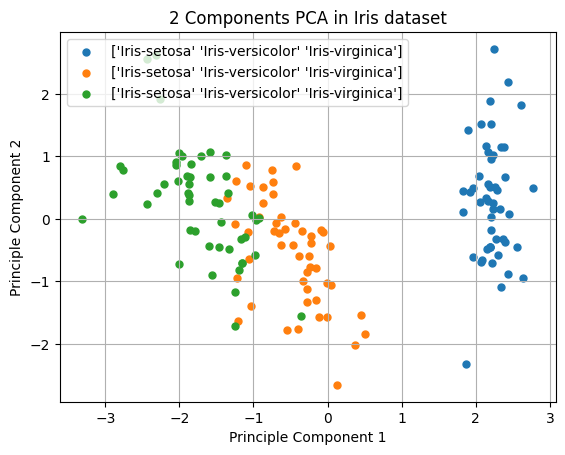

In [66]:
plt.title("2 Components PCA in Iris dataset")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
Species = np.unique(iris_y)
for Specie in Species:
    idxs = iris_y == Specie
    plt.scatter(reduced_iris_x[idxs,0],reduced_iris_x[idxs,1],s=25,label=Species)
plt.legend()
plt.grid()
plt.show()

# Implementing K-means clustering

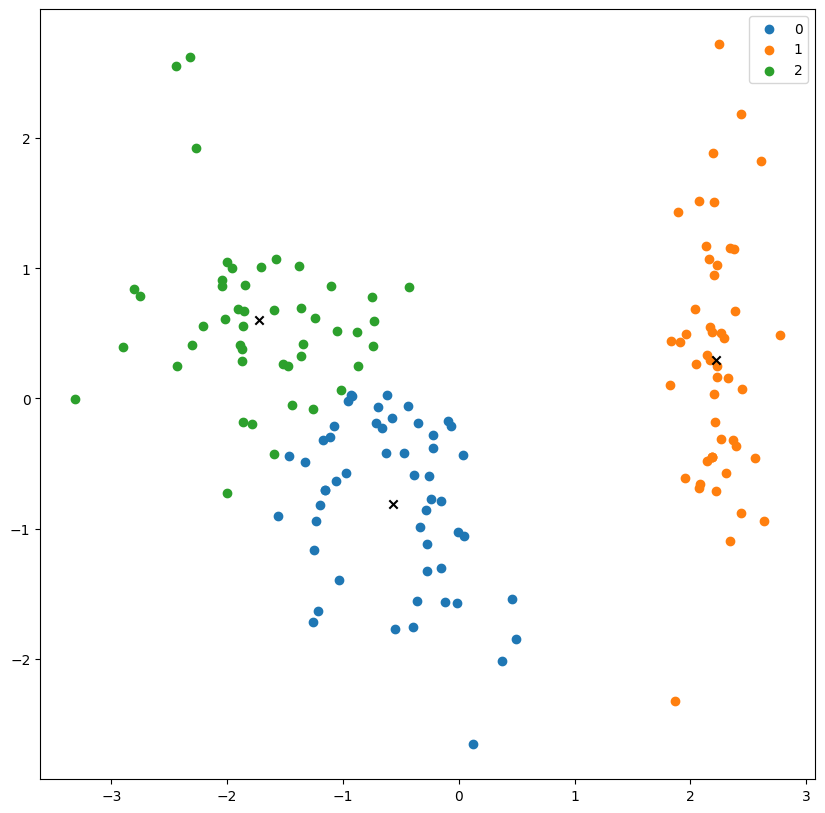

In [70]:
centers = model.cluster_centers_
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(reduced_iris_x)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(reduced_iris_x[label == i , 0] , reduced_iris_x[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()